<a href="https://colab.research.google.com/github/Zaine-eng/Zaine-eng/blob/main/Biblioteca_CoolProp_propriedades_agua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Propriedades de Vapor / água**

Instalando o coolprop para poder iniciar as configurações para análise da água.

In [8]:
!pip3 install coolprop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44.2 MB 1.3 MB/s 


In [9]:
import matplotlib
import numpy as np
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.interpolate

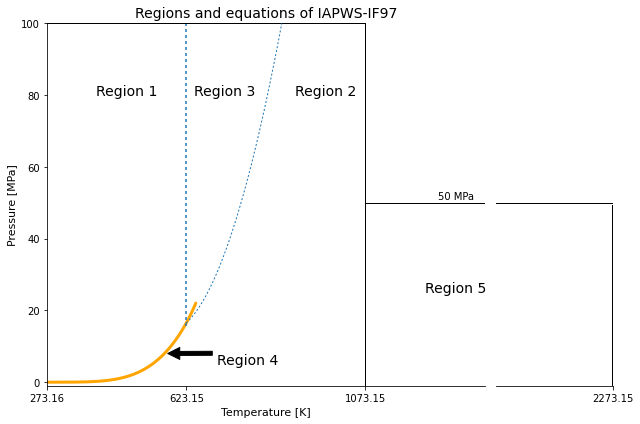

In [28]:
pc = CP.PropsSI('pcrit','IF97::Water')/1e6
Tc = CP.PropsSI('Tcrit','IF97::Water')
pt = CP.PropsSI('ptriple','IF97::Water')/1e6
Tt = CP.PropsSI('Ttriple','IF97::Water')
# Tmin = 273.15
Tmin = CP.PropsSI('Tmin','IF97::Water')
Tmax = CP.PropsSI('Tmax','IF97::Water')
pmax = CP.PropsSI('pmax','IF97::Water')/1e6
pmin = 0
Tb = 623.15
pb = 16.5291643
fillcolor = 'g'

fig = plt.figure(figsize = (9,6))
ax = plt.subplot2grid((1,9), (0,0), colspan=7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
lw = 3

# ----------------
# Saturation curve
# ----------------
Ts = np.linspace(Tt, Tc, 1000)
ps = CP.PropsSI('P','T',Ts,'Q',0,'IF97::Water')/1e6
plt.plot(Ts,ps,'orange',lw = lw, solid_capstyle = 'round')

# ------
# Labels
# ------

# ----------------
# Boundary lines
# ----------------
# plt.axhline(pc, dashes = [2, 2])
plt.axvline(x = Tb, ymin = pb/100, ymax = 1, dashes = [2, 2])
plt.axvline(x = Tmax, ymin = 0, ymax = 1, linewidth = 1, color = 'black')
plt.axhline(y = pmax, xmin = 0, xmax = (Tmax-Tmin)/(Tmax-Tmin+300), linewidth = 2, color = 'black')
plt.axhline(y = 50, xmin = (Tmax-Tmin)/(Tmax-Tmin+300), xmax = 1, linewidth = 1, color = 'black')

# -----------------------------
# Region 2-3 Boundary
# -----------------------------
n3 = 0.10192970039326e-2
n4 = 0.57254459862746e3
n5 = 0.1391883776670e2
PI = 2.0*np.arcsin(1.0)
TT = []
PP = list(np.linspace(pb,pmax,1000))
for p in PP:
    TT.append(n4+np.sqrt((p-n5)/n3))

plt.plot(TT,PP,lw=1, dashes = [2,2])

# Labels
plt.text(1300, 51, '50 MPa',ha= 'center')
plt.text(473, 80, 'Region 1', fontsize = 14, ha = 'center')
plt.text(973, 80, 'Region 2', fontsize = 14, ha = 'center')
plt.text(720, 80, 'Region 3', fontsize = 14, ha = 'center')
plt.text(1300, 25, 'Region 5', fontsize = 14, ha = 'center')
plt.annotate('Region 4', xy=(570, 8), xytext=(700, 5), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)
plt.title('Regions and equations of IAPWS-IF97', fontsize = 14)

plt.ylim(pmin-1,pmax)
ax.set_xticks([Tt, Tb, Tmax])
plt.gca().set_xlim(Tt, Tmax+300)
plt.ylabel('Pressure [MPa]', fontsize = 11)
plt.xlabel('Temperature [K]', fontsize = 11)
plt.tight_layout()

# -----------------------------
# Extended Temperature Region 5
# -----------------------------
bx = plt.subplot2grid((1,9), (0,7), colspan=2)
bx.spines['right'].set_visible(False)
bx.spines['top'].set_visible(False)
bx.spines['left'].set_visible(False)
bx.xaxis.set_ticks_position('bottom')
bx.yaxis.set_ticks_position('none')
bx.axes.get_yaxis().set_visible(False)
bx.set_xticks([2273.15])
bx.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# ----------------
# Boundary lines
# ----------------
plt.axhline(50, linewidth = 1, color = 'black')
plt.axvline(x = 2272, ymin = 0, ymax = 0.5, linewidth = 1, color = 'black')

# ----------------
# Plot Formatting
# ----------------
plt.ylim(pmin-1,pmax)
plt.gca().set_xlim(2173.15, 2273.15)
plt.tight_layout()


Puxando o PropsSI 

In [20]:
from CoolProp.CoolProp import PropsSI

In [23]:
#Specific heat capacity of Water at 500 K and 1 atm
In [2]: PropsSI('C','T',500,'P',101325,'IF97::Water')

1981.5422965970472

continuaa.....